### Classification with CIFAR-10 Dataset and ResNet network
This script sets up a ResNet-style network to classify two classes from the CIFAR-10 dataset.

In [1]:
import keras
import keras.backend as K
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Conv2D, Dense, Flatten, MaxPooling2D, Add, Activation, Dropout
from keras.optimizers import SGD
from matplotlib import pyplot as plt
import numpy as np
from utils import *

/usr/local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = get_cifar10_data(vectorize=False)

Build the model.

In [3]:
def res_block(x,c,s=1):
    if K.shape(x)[3] != c or s != 1:
        x_save = Conv2D(c,1,strides=s,activation=None)(x)
    else:
        x_save = x
    x = Conv2D(c,3,strides=s,padding='same',activation='relu',kernel_initializer='he_normal')(x)
    x = Conv2D(c,3,padding='same',activation=None,kernel_initializer='he_normal')(x)
    x = Add()([x,x_save])
    x = Activation('relu')(x)
    return x

x_in = Input((32,32,3))

x = res_block(x_in,64,2)
x = res_block(x,64)

x = res_block(x,128,2)
x = res_block(x,128)

x = res_block(x,256,2)
x = res_block(x,256)

x = Flatten()(x)
x = Dense(200,kernel_initializer='he_normal')(x)
x = Dropout(0.5)(x)
x = Dense(1,activation='sigmoid',kernel_initializer='he_normal')(x)
model = Model(inputs=x_in,outputs=x)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 16, 16, 64)   1792        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 16, 16, 64)   36928       conv2d_2[0][0]                   
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 16, 16, 64)   256         input_1[0][0]                    
__________________________________________________________________________________________________
add_1 (Add

Set up the model to optimize the categorical crossentropy loss using stochastic gradient descent.

In [4]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Optimize the model over the training data.

In [5]:
history = model.fit(x_train, y_train,
                    batch_size=100,
                    epochs=50,
                    verbose=1,
                    validation_split=0.1)

Train on 9000 samples, validate on 1000 samples
Epoch 1/50
9000/9000 [==============================] - 6s 621us/step - loss: 0.4904 - acc: 0.7653 - val_loss: 0.3266 - val_acc: 0.8510
Epoch 2/50
9000/9000 [==============================] - 4s 400us/step - loss: 0.2588 - acc: 0.8910 - val_loss: 0.1980 - val_acc: 0.9330
Epoch 3/50
9000/9000 [==============================] - 4s 398us/step - loss: 0.2065 - acc: 0.9153 - val_loss: 0.1707 - val_acc: 0.9380
Epoch 4/50
9000/9000 [==============================] - 4s 401us/step - loss: 0.1445 - acc: 0.9433 - val_loss: 0.1326 - val_acc: 0.9410
Epoch 5/50
9000/9000 [==============================] - 4s 398us/step - loss: 0.1031 - acc: 0.9611 - val_loss: 0.1933 - val_acc: 0.9480
Epoch 6/50
9000/9000 [==============================] - 4s 399us/step - loss: 0.0822 - acc: 0.9662 - val_loss: 0.1672 - val_acc: 0.9440
Epoch 7/50
9000/9000 [==============================] - 4s 395us/step - loss: 0.0695 - acc: 0.9718 - val_loss: 0.1655 - val_acc: 0.9290


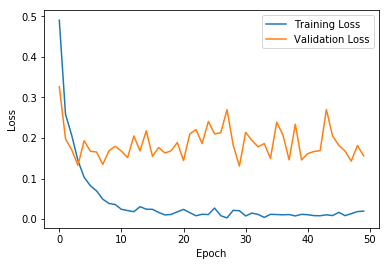

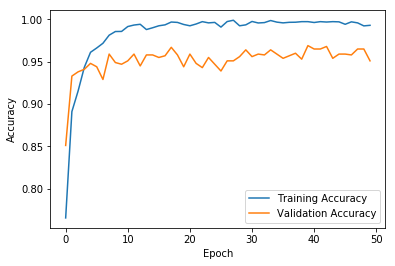

In [6]:
plot_history(history)

In [7]:
evaluate_test_accuracy(model,x_test,y_test)

2000/2000 [==============================] - 0s 195us/step
Test accuracy: 94.75%
